# Introduction

This tab, we will talk about ARM(Association Rule Mining). We will discover the tweet Users made which are the prediction they made to predict the final result of the FIFA World Cup.

# Theory

Association Rule Mining are used to find teh relations between various things. We should find three pattern: how many ways that support our rules,how confident we are for the patterns we observed, and how many things are related.

# Data Selection

In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
from apyori import apriori
import networkx as nx 
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [4]:
#Read data
df=pd.read_csv('../../data/01-modified-data/WC cleandata.csv')
df=df[df['label']==1]
df=df.drop(columns=['created_at'])
df=df.drop(columns=['author_id'])
df=df.drop(columns=['Tweet Point'])
df=df.drop(columns=['Follows'])
df=df.drop(columns=['keyword'])
df=df.drop(columns=['unofficial'])
df=df.drop(columns=['retweet_count'])
df=df.drop(columns=['Likes'])
df=df.drop(columns=['label'])
#replace the s(which is 's originally) and the t(which is 't originially) and re 
df["text"]=df["text"].str.replace(" s","")
df["text"]=df["text"].str.replace(" t","")
df["text"]=df["text"].str.replace(" re","")
df["text"]=df["text"].str.replace(" w","")
#drop "us" since the stopwords don't include it
df["text"]=df["text"].str.replace(" us","")
# drop the stopwords
def drop_stop(word_list):
    return[word for word in word_list if word not in stopwords.words('english')]
df["text"].fillna("",inplace=True)
df["text"]=df["text"].apply(word_tokenize)
df.head()

,text
0,"[Dr, alhammadi, 22, They, are, alsohe, graves,..."
1,"[DolapoAina, FIFAWorldCup, qatarairways, aviat..."
2,"[If, anyone, knows, anyone, goingo, Qatar, for..."
3,"[67, DAYS, TO, GO, Qatar2022, FIFAWorldCup, Co..."
4,"[AlSultanBeach, Here, is, a, map, I, made, for..."


# Model Building

                            rhs             lhs      supp      conf  \
0                   [Argentina]           [The]  0.054740  0.911111   
1                   [Argentina]            [be]  0.054740  0.911111   
2                   [Argentina]  [championould]  0.054072  0.900000   
3                      [Brazil]           [The]  0.100134  0.931677   
4                         [Cup]         [World]  0.078104  0.959016   
..                          ...             ...       ...       ...   
68  [be, England, championould]           [The]  0.054072  1.000000   
69       [France, championould]       [be, The]  0.062083  1.000000   
70            [be, France, The]  [championould]  0.062083  0.902913   
71  [France, The, championould]            [be]  0.062083  1.000000   
72   [France, be, championould]           [The]  0.062083  1.000000   

    supp x conf       lift  
0      0.049874   2.049316  
1      0.049874   2.083732  
2      0.048665   2.308562  
3      0.093292   2.095574  
4 

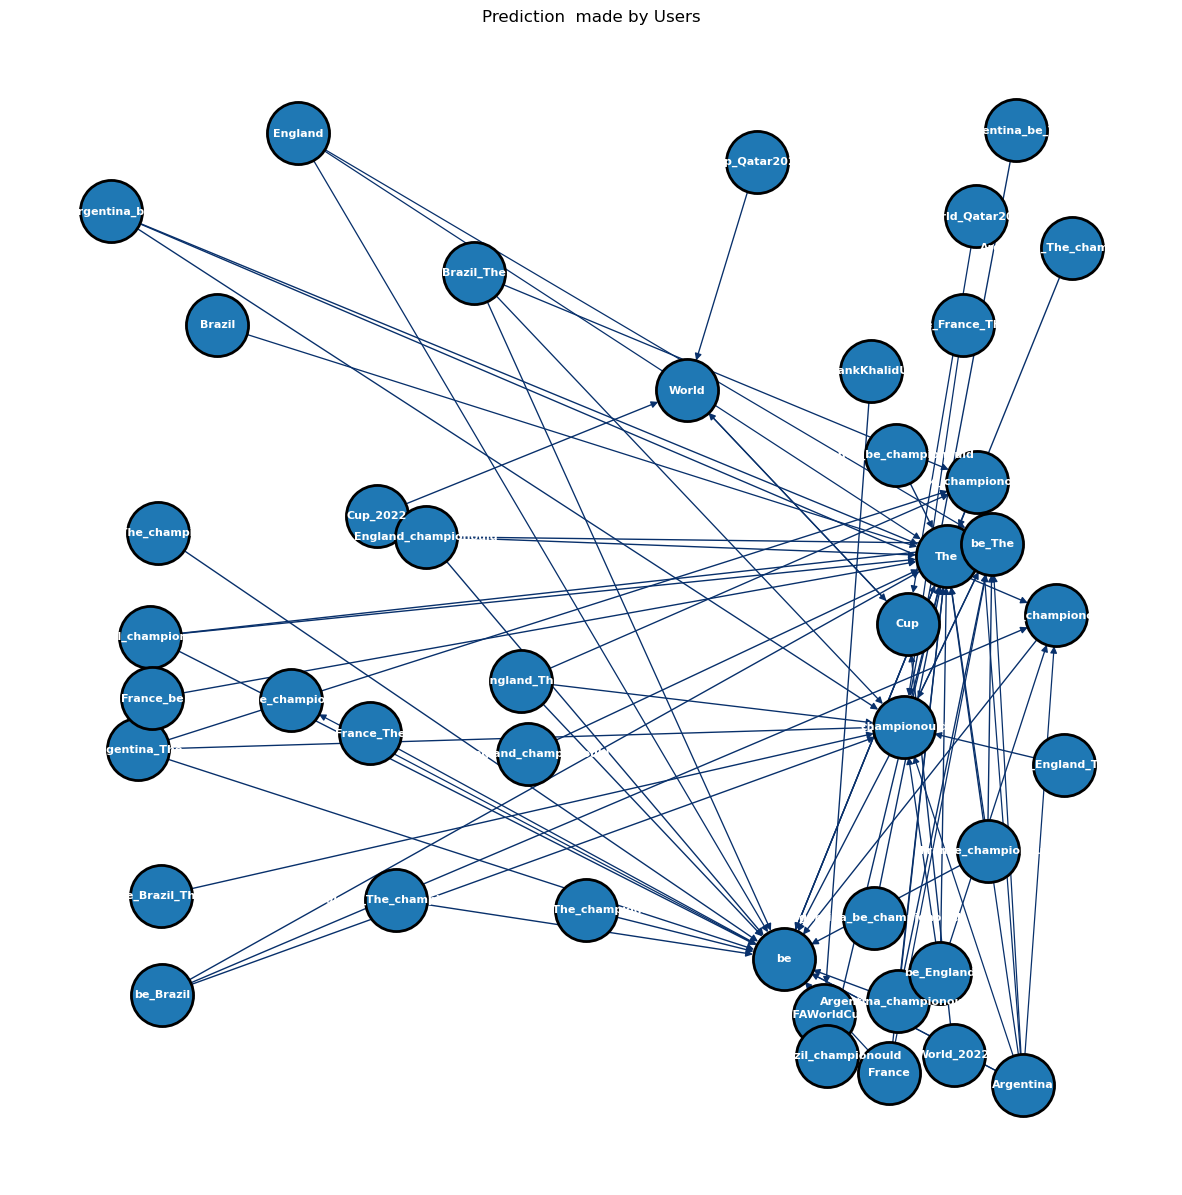

In [64]:
def reformat_results(results):

    keep =[]
    for i in range(0, len(results)):
        for j in range(0, len(list(results[i]))):
            if (j>1):
                for k in range(0, len(list(results[i][j]))):
                    if (len(results[i][j][k][0]) != 0):
                        rhs = list(results[i][j][k][0])
                        lhs = list(results[i][j][k][1])
                        conf = float(results[i][j][k][2])
                        lift = float(results[i][j][k][3])
                        keep.append([rhs,lhs,supp,conf,supp*conf,lift])
            if (j==1):
                supp = results[i][j]

    return pd.DataFrame(keep, columns =["rhs","lhs","supp","conf","supp x conf","lift"])

def convert_to_network(df):
    print(df)

    #BUILD GRAPH
    G = nx.DiGraph()  # DIRECTED
    for row in df.iterrows():
        # for column in df.columns:
        lhs="_".join(row[1][0])
        rhs="_".join(row[1][1])
        conf=row[1][3]; #print(conf)
        if(lhs not in G.nodes): 
            G.add_node(lhs)
        if(rhs not in G.nodes): 
            G.add_node(rhs)

        edge=(lhs,rhs)
        if edge not in G.edges:
            G.add_edge(lhs, rhs, weight=conf)
    return G

def plot_network(G):
    #SPECIFIY X-Y POSITIONS FOR PLOTTING
    pos=nx.random_layout(G)

    #GENERATE PLOT
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 15)

    #assign colors based on attributes
    weights_e   = [G[u][v]['weight'] for u,v in G.edges()]

    #SAMPLE CMAP FOR COLORS 
    cmap=plt.cm.get_cmap('Blues')
    colors_e    = [cmap(G[u][v]['weight']*10) for u,v in G.edges()]

    #PLOT
    nx.draw(
    G,
    edgecolors="black",
    edge_color=colors_e,
    node_size=2000,
    linewidths=2,
    font_size=8,
    font_color="white",
    font_weight="bold",
    width=weights_e,
    with_labels=True,
    pos=pos,
    ax=ax
    )
    ax.set(title='Prediction  made by Users')
    plt.show()


results = list(apriori(df['text'], min_support=0.05, min_confidence=0.9, min_length=3, max_length=10))
pd_results = reformat_results(results)
G = convert_to_network(pd_results)
plot_network(G)

# Result

According to the plot shows, we can find some part of the result that we ecpected to see.

First, the "2022 FIFA Worldcup" is the key word we search so that's very common to see it, and there are four country appear most which are "Brazil","England","France","Argentina".

So this can indicate that from the aspect of the users the champion of the Worldcup would  occur in this four countries.

# Conclusion

In this tab, we can find the ARM can help us to find out the relationship that we need, we can use the ARM to find out the relationship between the textdata we find.